In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline


import numpy as np
from matplotlib import pyplot as plt


### Experiment exp_05

##### LPN architecture

```
num_preds(word, 2).
num_preds(syll, 3).
num_preds(cons, 3).
num_preds(vow,  3).


pred(Category, Index, Pred) :-
        num_preds(Category, N), 
        between(1, N, Index),
        format(atom(Pred), "A(~w, ~w)", [Category, Index]).

pred(Category, Pred) :- pred(Category, _, Pred).

consonant(C) :-
        consonants(Cs),
        member(C, Cs).

vowel(V) :-
        vowels(Vs),
        member(V, Vs).

from_cat(cons, X) :-
        consonant(X).
from_cat(vow, X) :-
        vowel(X).

lexeme(X) :-
        from_cat(cons, X)
        ;
        from_cat(vow, X).

:- begin(genlog).

hear(X-Y) ---> 'A(word, 1)'(X-Y|[]-[]).

macro(
      ('?A'(Xi-Yf|Z) ---> '?B'(Xi-Yi | Z), '?C'(Yi-Yf | Z))
     :-
     (pred(word, '?A'),
      pred(syll, '?B'),
      pred(word, '?C')
      )
     ).

macro(
      ('?A'(Xi-Yf|Z) ---> '?B'(Xi-Yi | Z), '?C'(Yi-Yf | Xi-Yi))
     :-
     (pred(word, '?A'),
      pred(syll, '?B'),
      pred(word, '?C')
      )
     ).


macro(
      ('?A'([A, B, C|X]-X|Z) ---> '?B'([A, B, C| X]-X | Z))
     :-
     (pred(word, '?A'),
      pred(syll, '?B'))
     ).

macro(
      ('?A'(X-X|Z))
     :-
     (pred(word, '?A'))
     ).


macro(
      ('?A'([A, B, C|R] - R | Z1-Z2) --->
       '?B'(A|Z1-Z2),
       '?C'(B|[A|Z1]-Z2),
       '?D'(C|[B, A | Z1]-Z2))
     :-
     (pred(syll, '?A'),
      pred(cons, '?B'),
      pred(vow,  '?C'),
      pred(cons, '?D'))
      ).

macro(
      ('?A'(X | Y-R) @ [Y \= R, Y = [A|Z]] --->
       '?B'(X | Z-R)
      )
     :-
     (member(Cat, [cons, vow]),
      pred(Cat, '?A'),
      pred(Cat, '?B'),
      lexeme(A)
     )
     ).

macro(
      ('?A'(A | Y - R) @ [Y \= R, Y = [B|Z]] --->
       '?B'(A | Z - R)
      )
     :-
     (member(Cat, [cons, vow]),
      pred(Cat, '?A'),
      pred(Cat, '?B'),
      from_cat(Cat, A),
      lexeme(B)
     )
     ).


macro(
      ('?A'(X | R-R))
     :-
     (member(Cat, [cons, vow]),
      pred(Cat, '?A'),
      from_cat(Cat, X)
     )
     ).
:- end(genlog).
```                            
                           
        
        
    
##### Experiment parameters

* evidence: power law distribution 1/N^(3/4)
* beam_width: 10
* time limit: 10 seconds
* max_iter: 2000
* started: 2:20 pm 7/1
* run on ec2 swarm (job id: x2AlTMupHdAyAuxP)
* two parallel runs (different random seeds)
    * subjob id: HXMO0cvBeFv0pxd
    * subjob id: lIhkOhqzpm3ebjOu

In [4]:
# Data distribution for first 99 iterations
# Collected by running the following using prolog script compute_data_histogram.pl
# findall(I, between(1, 200, I), Iters), data_from_iter_as_numbers('/Users/edechter/Dropbox/Projects/SDCL/experiments/data/lIhkOhqzpm3ebjOu', Iters, Ds), writeln(Ds).
# findall(I, between(1, 200, I), Iters), data_from_iter_as_numbers('/Users/edechter/Dropbox/Projects/SDCL/experiments/data/HXMO0cvBeFv0vpxd', Iters, Ds), writeln(Ds).
data = {}
data['HXMO0cvBeFv0pxd'] = np.array([22,9,57,1,2,8,58,20,2,74,8,27,65,38,2,82,48,70,39,4,11,66,76,24,92,3,1,4,4,12,21,2,16,62,58,20,98,8,21,5,7,34,14,16,2,70,38,20,47,6,29,17,24,9,1,44,4,25,2,57,37,5,11,53,4,26,1,9,87,7,12,3,8,13,48,47,10,60,74,5,52,17,66,13,92,8,18,2,50,39,5,28,5,88,48,1,1,3,23,88,24,8,3,28,29,55,1,36,2,7,43,32,6,1,19,4,3,2,21,2,87,1,73,13,47,79,53,80,19,6,39,16,90,36,16,41,2,86,39,2,38,62,86,2,45,65,49,75,57,17,30,2,9,21,33,5,18,1,2,2,3,49,91,58,28,62,71,4,6,32,2,75,12,1,34,10,69,54,25,11,1,66,18,29,41,79,1,3,59,1,6,56,17,2,8,2,75,12,63,3])
data['lIhkOhqzpm3ebjOu'] = np.array([75,6,93,3,21,2,7,7,7,54,32,6,48,55,55,5,4,2,30,20,22,28,1,52,1,75,8,10,1,19,28,42,93,16,17,4,9,40,18,46,19,42,87,29,18,29,16,7,19,38,87,96,3,5,2,8,8,18,7,1,72,99,3,2,2,38,61,1,67,1,69,9,14,23,13,17,8,11,85,10,20,16,54,3,94,2,93,59,6,72,14,16,47,15,21,3,1,5,2])

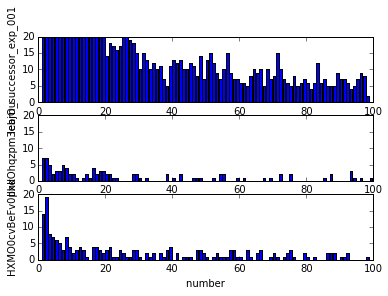

In [8]:
# Plot data histogram for first 200 iterations
from collections import Counter
counts={}
fig = plt.figure()

def data_counts(subjobid, iterations): 
    run_data = data[subjobid][iterations]
    return Counter(run_data)

for i, (subjobid, vs) in enumerate(data.items()):
    counts[subjobid] = Counter(vs)
    ax = fig.add_subplot(3, 1, i+1)
    ax.bar(counts[subjobid].keys(), counts[subjobid].values())
    ax.set_ylim(0, 20)
    ax.set_xlim(0, 100)
    ax.set_ylabel(subjobid)
    ax.set_xlabel('number ')

#### Analysis of one of the runs of exp_05:  every 100 iterations

* job id: HXMO0cvBeFv0pxd
* data generated by running:

```
parallel --joblog /tmp/ovbem_log ./number_loglike.pl out_gl_{}_seq_1_99.json ../../data/HXMO0cvBeFv0vpxd/ovbem_gl_{}.gl `seq 1 99` ::: $(seq -f "%04.0f" 1 100 2000)
```
https://github.com/edechter/GenLog/blob/f625f40616f6d9443fbf76836999218350b8de87/experiments/scripts/learn_number_morph/number_loglike.pl
* run time of each job was approximate 585s

##### Further analysis: running loglikelihood for runs 1 thrugh 200 every 10 iterations

* @ 1:40pm 7/3/2015
* ```parallel --joblog /tmp/exp_05_analysis_0002.log ./number_loglike.pl out_gl_{}_seq_1_99.json ../../data/HXMO0cvBeFv0vpxd/ovbem_gl_{}.gl `seq 1 99` ::: $(seq -f "%04.0f" 1 10 200) &``` 

In [ ]:
import glob
import json
import re

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  


In [ ]:
num_files = 20
files = glob.glob('../../../../data/exp_05_analysis/HXMO0cvBeFv0pxd/out_gl*json')[0:num_files]

import matplotlib.gridspec as gridspec

# we will use two gridspecs, one for each iteration 
# and one for the whole figure

figure_gs = gridspec.GridSpec(num_files, 1)
individual_grids = []
for  i in range(num_files):
     individual_gs = gridspec.GridSpecFromSubplotSpec(2,1, height_ratios=[2,1], 
     		     hspace=0, subplot_spec=figure_gs[i])
     individual_grids.append(individual_gs)

fig = plt.figure(figsize=(15, 2 * num_files))

for i, file in enumerate(files):
    gl_iter = int(re.match(r'.*(\d\d\d\d).*', file).groups()[0])
    print "%s "%gl_iter, 

    ax2 = fig.add_subplot(individual_grids[i][1])
    evidence = data_counts('HXMO0cvBeFv0pxd', range(gl_iter))
    ax2.bar(np.array(evidence.keys())-0.5, np.array(evidence.values()), facecolor='k')
    ax2.set_xlim(0, 100)
    ax2.set_ylim(0, 10)	
    ax.set_xticks(range(1, 100, 1))

    ax = fig.add_subplot(individual_grids[i][0])
    obj = json.load(open(file, 'r'))
    xs = np.array([[x['number'], x['loglikelihood']] for x in obj])
    xs[:, 1] = np.exp(xs[:, 1])  # exponentiate log likelihoods to get probabilities
    ax.bar(xs[:,0]-0.5, (xs[:,1]), color=tableau20[np.mod(i, 20)])
    ax.set_yticks([])    
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylabel('iter %i'%gl_iter)




> <ipython-input-60-8d83b8cd99a6>(7)data_counts()
      6 def data_counts(subjobid, iterations):
----> 7     run_data = data[subjobid][iterations]
      8     return Counter(run_data)



IndexError: index 200 is out of bounds for axis 1 with size 200

201 191  181  171  161  151  141  131  121  111  101  91  81  71  61  51  41  31  21  11   1  

In [ ]:
blach blach

**Figure:** Negative log likelihood of number words as a function of the number of words seen so far. If no parse of the number was found, then the negative log likelihood is set to a maximum value (e.g. number 1 iteration 1). 

#### Same analysis for second  run of exp_05

* job id: lIhkOhqzpm3ebjOu
* started at 4:05pm 7/3/2015
```
parallel --results /tmp/ovbem_analysis \
    --joblog=/tmp/ovbem_log_0002 \
    ./number_loglike.pl ../../data/exp_05_analysis/lIhkOhqzpm3ebjOu/out_gl_{}_seq_1_99.json ../../data/lIhkOhqzpm3ebjOu/ovbem_gl_{}.gl `seq 1 99` ::: $(seq -f "%04.0f" 1 10 200)
```

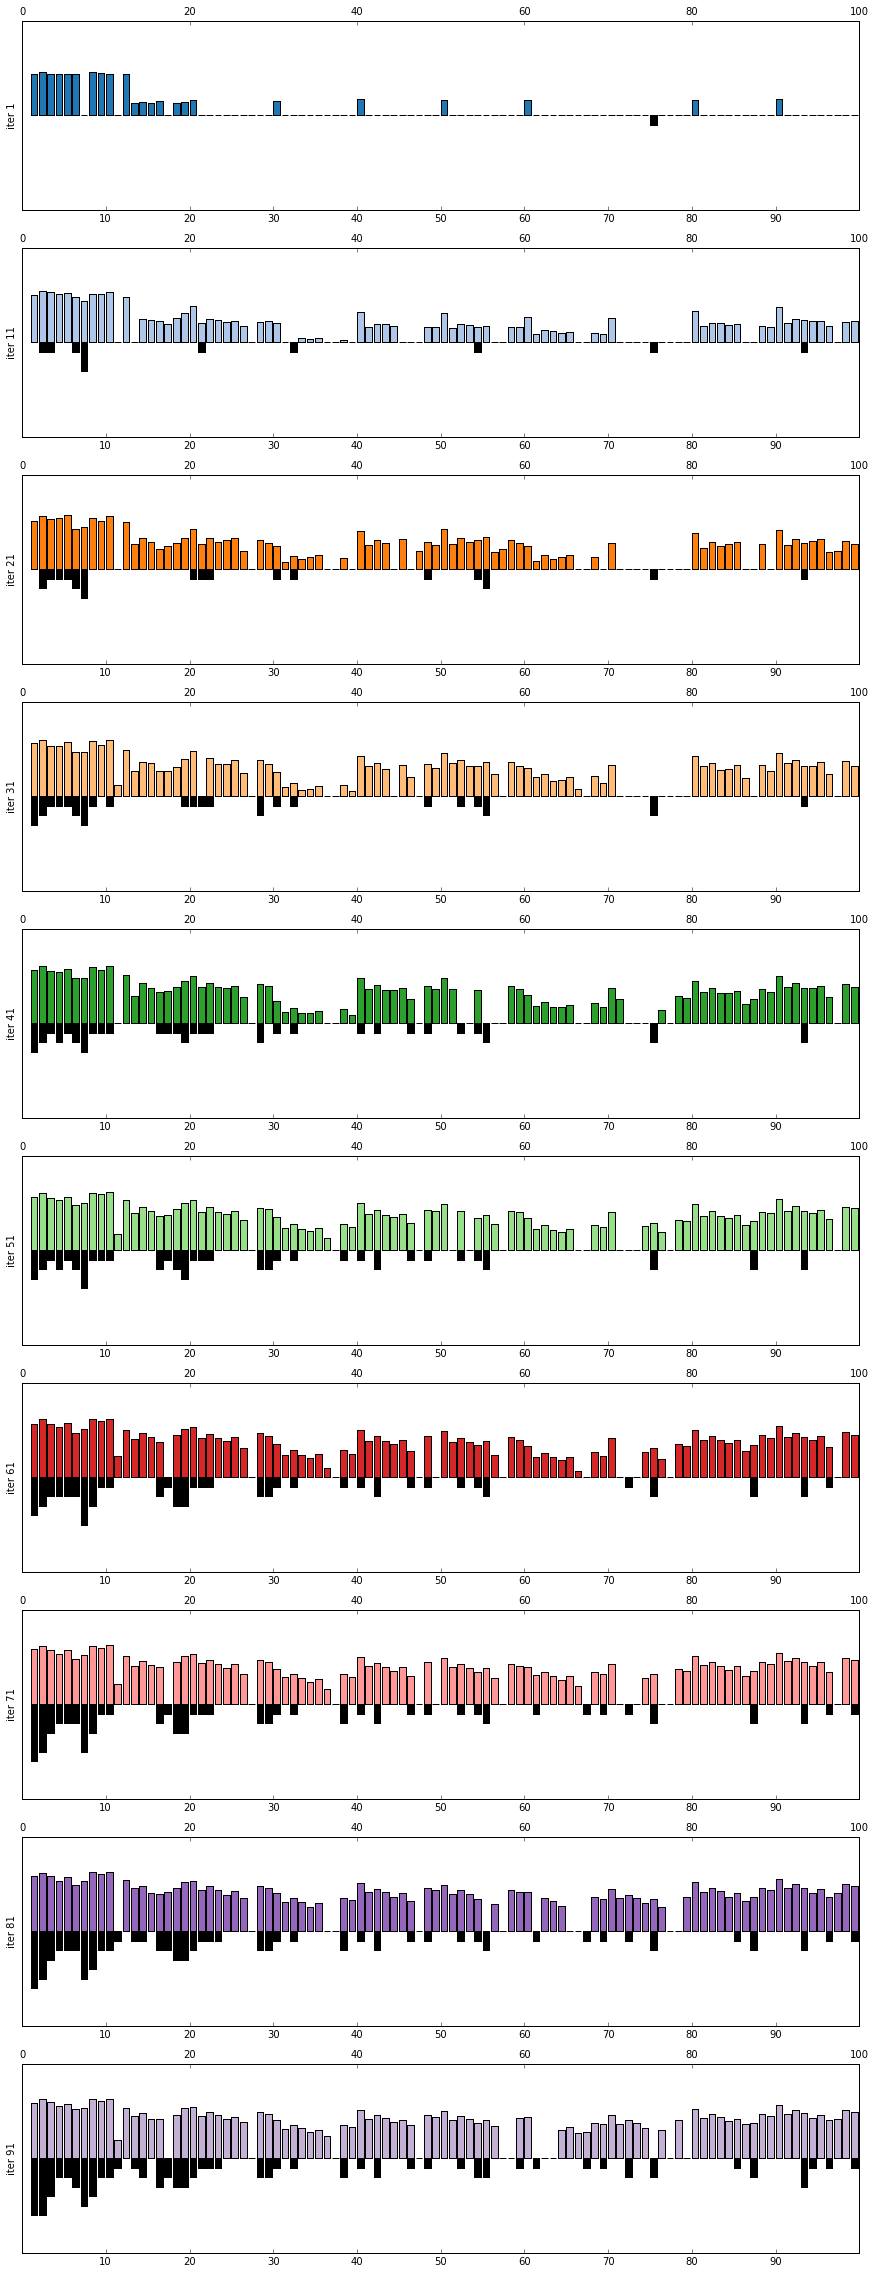

1  11  21  31  41  51  61  71  81  91 


In [73]:

files = glob.glob('../../../../data/exp_05_analysis/lIhkOhqzpm3ebjOu/out_gl*json')[0:10]

min_val = -70

fig = plt.figure(figsize=(15, 40))

num_files = len(files)
for i, file in enumerate(files):
    gl_iter = int(re.match(r'.*(\d\d\d\d).*', file).groups()[0])
    print "%s "%gl_iter, 
    ax = fig.add_subplot(num_files, 1, i+1)
    
    
    evidence = data_counts('lIhkOhqzpm3ebjOu', range(gl_iter))
    ax2 = plt.twiny(ax)
    ax2.bar(evidence.keys(), -10*np.array(evidence.values()), facecolor='k')
    ax2.set_xlim(0, 100)
    ax2.set_ylim(-100, 100)

    obj = json.load(open(file, 'r'))
    xs = np.array([[x['number'], x['loglikelihood']] for x in obj])
    xs[xs < min_val]=min_val # clip loglikelihood at min_val
    xs[:, 1] = -(min_val-xs[:, 1])  # make values positive the way Josh asked
    ax.bar(xs[:,0], (xs[:,1]), color=tableau20[np.mod(i, 20)])
    ax.set_yticks([])    
    ax.set_xticks(range(10, 100, 10))
    ax.set_xticklabels(range(10, 100, 10))
    ax.set_ylabel('iter %i'%gl_iter)




In [6]:
data['learn_successor_exp_001'] = [2,2,31,68,3,4,60,2,54,10,1,2,4,18,53,17,4,2,1,72,24,39,4,6,8,91,55,3,5,75,1,14,5,2,18,4,24,14,3,51,7,1,2,2,1,2,3,8,90,54,21,3,8,46,31,32,4,13,24,2,1,9,6,10,43,90,21,5,3,38,10,95,1,22,29,84,2,53,1,1,12,28,16,27,42,2,4,1,33,21,74,21,1,10,5,1,12,4,8,5,55,3,20,41,1,6,25,50,13,6,13,3,14,13,1,42,27,72,3,3,2,3,7,3,48,4,11,2,2,27,22,6,23,1,21,1,3,3,19,5,65,2,34,14,64,1,1,2,58,44,58,16,2,4,95,41,24,86,3,1,4,41,59,3,24,1,26,1,71,6,1,6,60,22,5,6,2,4,3,24,21,48,1,1,27,16,1,2,1,4,1,3,32,2,13,8,76,52,13,1,87,42,66,34,13,3,43,17,79,1,17,2,64,52,8,36,55,24,49,25,12,1,22,70,1,5,3,59,2,12,31,34,4,3,5,48,73,2,47,37,69,94,18,19,3,3,1,1,1,63,16,71,67,5,6,13,5,13,42,4,3,30,17,53,35,1,23,12,5,5,44,51,1,2,29,14,8,90,6,37,70,42,11,66,8,12,72,4,56,26,51,1,13,3,3,10,75,26,26,1,3,53,89,3,9,18,6,6,18,8,67,2,2,19,28,12,1,13,76,25,17,48,51,11,3,66,9,17,24,40,3,6,4,1,2,86,63,68,1,80,1,52,2,1,20,1,84,27,20,26,1,1,25,45,1,90,45,1,15,7,32,14,1,63,22,46,19,21,1,19,15,16,42,4,36,55,22,70,1,36,18,4,3,13,19,45,48,4,51,3,8,9,4,43,2,57,25,7,47,1,13,4,80,1,45,39,98,62,12,2,1,7,3,42,33,6,2,63,2,75,3,2,3,2,74,61,97,1,8,5,8,1,17,3,19,69,44,76,1,1,56,36,1,26,13,97,31,80,56,1,16,1,1,4,4,97,1,58,11,3,1,53,21,4,2,54,14,23,10,4,3,5,3,2,76,1,56,7,7,41,1,29,96,16,78,63,1,25,4,1,9,1,12,23,29,54,72,48,71,97,6,2,6,94,9,1,1,9,17,24,2,26,35,1,19,1,2,11,57,69,88,16,10,16,18,14,69,41,16,85,1,3,30,6,4,24,39,23,2,1,9,7,3,43,52,1,4,2,16,1,10,1,87,1,3,14,3,1,40,15,2,31,15,56,11,18,56,2,83,21,93,15,13,10,83,6,7,24,1,69,2,1,6,5,17,39,50,2,20,47,10,7,12,3,57,19,1,13,9,32,6,1,1,1,2,60,34,36,10,41,9,9,85,1,5,1,27,12,1,4,14,6,26,10,95,1,22,71,96,3,15,12,37,73,36,18,1,49,10,1,28,26,1,40,26,1,9,13,4,45,35,2,92,1,47,97,8,34,89,9,6,4,19,48,1,5,4,6,2,39,89,6,92,98,1,2,23,53,22,21,30,23,5,12,61,41,61,85,28,70,79,91,6,6,12,13,40,6,26,1,16,36,18,6,42,2,1,12,2,29,44,57,43,4,19,42,1,26,22,85,18,44,77,2,1,68,18,1,14,96,72,65,14,50,9,3,4,5,20,51,1,1,8,22,3,33,15,66,78,1,50,4,26,60,17,13,5,95,7,29,1,17,75,11,17,55,5,1,1,1,72,1,41,1,18,3,9,17,30,97,61,3,9,25,5,4,15,1,8,17,13,19,1,5,33,18,3,4,7,56,65,1,1,68,5,1,27,5,5,34,72,28,62,5,2,2,2,3,63,73,10,65,56,3,26,1,2,42,18,23,2,33,57,26,12,9,5,2,13,10,79,80,6,27,2,58,1,9,10,3,16,4,87,1,10,5,5,11,16,40,44,77,35,1,13,91,21,1,14,1,29,3,6,35,3,6,59,1,91,13,3,32,3,3,66,51,1,28,18,7,13,6,65,26,16,2,11,2,17,2,43,12,14,20,1,29,28,3,1,33,79,14,1,10,6,72,48,52,17,78,89,1,7,1,1,24,30,2,2,52,1,4,85,18,46,1,65,86,17,4,4,86,71,40,1,37,66,6,5,5,1,76,2,11,1,2,52,1,12,1,56,1,1,25,50,7,40,69,25,13,2,27,8,32,1,2,55,9,88,10,31,3,26,31,13,82,7,21,46,40,81,46,58,2,1,47,44,6,28,25,24,70,8,2,2,71,83,12,4,79,1,47,2,19,8,46,1,1,1,1,56,2,83,5,4,2,11,82,4,2,20,12,42,12,90,40,2,89,5,28,78,1,50,6,25,14,25,16,71,14,52,50,66,1,11,38,6,2,1,74,6,5,88,6,57,37,1,2,16,13,29,5,8,43,48,27,10,83,3,19,11,2,67,7,1,15,5,73,36,12,13,16,4,4,25,71,4,46,6,2,24,11,28,2,64,40,2,1,15,3,47,15,91,67,2,51,32,1,2,41,6,9,15,16,16,5,22,1,96,84,8,1,1,37,92,81,96,58,84,2,1,5,7,1,29,39,1,10,89,86,4,90,1,33,1,61,89,22,3,1,35,22,2,25,10,3,1,1,28,13,1,51,24,2,1,13,74,31,49,31,13,15,80,69,32,89,1,7,6,9,42,8,6,10,46,2,1,12,3,1,2,95,1,23,47,3,1,7,57,17,1,27,1,1,4,12,1,1,9,4,11,23,6,9,1,1,1,2,2,3,13,2,19,14,7,51,15,79,7,2,27,94,4,14,19,14,10,4,87,2,2,32,7,1,9,1,6,88,25,6,13,2,3,1,2,57,11,68,8,10,70,31,10,2,57,76,1,18,1,1,13,50,1,2,15,6,48,3,2,1,1,6,62,2,10,12,80,23,13,2,45,4,16,22,50,44,10,21,1,91,6,1,9,8,39,11,4,5,5,11,16,1,10,33,1,59,17,2,62,71,4,11,1,1,13,5,10,1,10,50,74,1,5,11,17,3,72,1,97,81,71,22,28,17,92,1,2,1,59,13,5,1,56,1,2,2,1,28,28,3,31,2,29,36,3,83,2,8,7,93,8,11,8,24,5,21,29,53,1,53,32,16,7,51,1,13,3,2,45,2,2,7,9,18,2,15,25,82,14,1,1,71,5,1,10,5,73,4,14,40,1,21,1,33,7,97,11,3,41,52,2,3,11,1,15,12,3,18,18,2,7,92,4,16,45,49,3,4,48,1,1,5,4,10,81,18,2,32,1,1,4,4,8,9,6,1,23,1,2,8,9,5,8,12,17,10,7,12,6,27,55,3,2,49,45,19,4,83,31,63,9,1,2,7,4,5,67,35,24,6,3,56,27,96,1,5,1,66,88,8,64,52,71,19,1,49,2,9,21,71,2,16,1,60,77,2,8,64,4,1,13,84,71,83,5,3,27,83,78,12,27,3,32,68,3,4,93,3,16,95,1,9,1,19,1,26,39,19,5,39,10,35,2,12,3,8,2,2,6,25,59,49,1,74,1,6,17,25,12,7,2,4,1,2,15,1,55,12,35,3,2,83,1,3,55,4,5,52,8,3,1,85,2,20,1,30,34,23,5,68,5,10,1,1,41,82,44,1,7,36,4,84,9,8,7,13,11,9,1,41,18,3,1,1,89,4,6,1,1,1,6,4,21,16,10,20,25,66,8,5,4,5,34,2,16,39,4,1,3,94,12,11,59,8,14,6,56,2,71,48,15,72,1,27,10,91,1,3,10,48,1,2,3,7,1,5,64,4,51,2,28,1,28,5,46,2,14,7,28,7,23,38,6,42,96,3,14,1,10,5,5,14,51,62,2,26,15,34,16,1,1,25,2,1,65,2,1,96,40,3,1,15,46,16,12,12,5,30,2,73,60,2,12,19,18,6,18,50,1,3,7,15,70,1,16,38,64,78,34,10,1,68,36,30,10,9,12,1,82,2,5,43,1,16,23,5,2,3,2,12,17,4,14,26,2,75,31,9,34,38,77,2,3,45,54,64,1,65,10,1,83,17,90,37,3,1,46,53,92,3,73,1,7,19,3,5,45,1,3,8,2,7,76,30,12,2,3,1,45,76,1,35,65,12,51,5,2,3,33,16,43,17,66,63,26,9,8,1,1,13,79,85,50,2,70,1,11,50,32,8,1,31,48,2,3,16,6,18,9,5,10,1,2,2,3,7,17,1,22,27,12,17,1,5,4,1,12,77,1,4,17,1,2,2,17,8,51,10,1,56,54,2,6,93,29,30,26,7,19,1,1,55,56,27,1,11,96,29,12,4,1,29,20,6,11,20,1,3,4,1,6,1,4,15,5,23,5,4,2,18,4,14,4,14,15,22,94,1,1,34,87,95,54,1,4,13,15,52,20,1,28,3,61,1,43,7,83,58,64,9,31,10,4,1,7,39,1,1,21,44,68,10,68,9,1,18,20,11,2,15,5,5,82,64,20,6,40,2,4,1]